# MGM Veri İnceleme

Kaggle üzerinden birleştirdiğimiz verileri düzenleyeceğiz ve inceleyeceğiz.

1. Verileri İçeri Aktarma
2. Kayıp Değer Tespiti ve Düzenlemesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings # gereksiz uyarıları da kapatalım
warnings.filterwarnings("ignore")

In [2]:
os.listdir("../input/2204-d-mgm-verileri-bir-araya-getirme")

['ilce_istasyon.csv',
 'Konya_Istasyon.csv',
 'Karapinar_Istasyon.csv',
 'KonOrt_Istasyon.csv',
 '__results__.html',
 'Nigde_Istasyon.csv',
 'HavOrt_Istasyon.csv',
 'Cumra_Istasyon.csv',
 'Karaman_Istasyon.csv',
 'Eregli_Istasyon.csv',
 '__notebook__.ipynb',
 'Seydisehir_Istasyon.csv',
 '__output__.json',
 'Beysehir_Istasyon.csv',
 'Kulu_Istasyon.csv',
 'il_istasyon.csv',
 'Aksaray_Istasyon.csv',
 'custom.css']

## 1. Verileri İçeri Aktarma

In [3]:
aks_df = pd.read_csv("../input/2204-d-mgm-verileri-bir-araya-getirme/Aksaray_Istasyon.csv")
aks_df.drop(columns = "Unnamed: 0", inplace = True)
bey_df = pd.read_csv("../input/2204-d-mgm-verileri-bir-araya-getirme/Beysehir_Istasyon.csv")
bey_df.drop(columns = "Unnamed: 0", inplace = True)
ere_df = pd.read_csv("../input/2204-d-mgm-verileri-bir-araya-getirme/Eregli_Istasyon.csv")
ere_df.drop(columns = "Unnamed: 0", inplace = True)
cum_df = pd.read_csv("../input/2204-d-mgm-verileri-bir-araya-getirme/Cumra_Istasyon.csv")
cum_df.drop(columns = "Unnamed: 0", inplace = True)
krm_df = pd.read_csv("../input/2204-d-mgm-verileri-bir-araya-getirme/Karaman_Istasyon.csv")
krm_df.drop(columns = "Unnamed: 0", inplace = True)
krp_df = pd.read_csv("../input/2204-d-mgm-verileri-bir-araya-getirme/Karapinar_Istasyon.csv")
krp_df.drop(columns = "Unnamed: 0", inplace = True)
kon_df = pd.read_csv("../input/2204-d-mgm-verileri-bir-araya-getirme/Konya_Istasyon.csv")
kon_df.drop(columns = "Unnamed: 0", inplace = True)
kor_df = pd.read_csv("../input/2204-d-mgm-verileri-bir-araya-getirme/KonOrt_Istasyon.csv")
kor_df.drop(columns = "Unnamed: 0", inplace = True)
hav_df = pd.read_csv("../input/2204-d-mgm-verileri-bir-araya-getirme/HavOrt_Istasyon.csv")
hav_df.drop(columns = "Unnamed: 0", inplace = True)
sey_df = pd.read_csv("../input/2204-d-mgm-verileri-bir-araya-getirme/Seydisehir_Istasyon.csv")
sey_df.drop(columns = "Unnamed: 0", inplace = True)
nig_df = pd.read_csv("../input/2204-d-mgm-verileri-bir-araya-getirme/Nigde_Istasyon.csv")
nig_df.drop(columns = "Unnamed: 0", inplace = True)
kul_df = pd.read_csv("../input/2204-d-mgm-verileri-bir-araya-getirme/Kulu_Istasyon.csv")
kul_df.drop(columns = "Unnamed: 0", inplace = True)

In [4]:
hav_df = hav_df.rename(columns = {"istasyon" : "İstasyon"})

In [5]:
kor_df = kor_df.rename(columns = {"istasyon" : "İstasyon"})

In [6]:
aks_df

,İstasyon,Yıl,Ay,max_sic,max_yag,min_sic,ortmin_sic,ort_sic,top_yag,ortmax_sic
0,Aksaray,2000,1,14.2,NaN,-16.0,-8.1,-3.7,NaN,0.6
1,Aksaray,2000,2,11.9,NaN,-12.0,-5.2,-1.5,NaN,3.1
2,Aksaray,2000,3,23.2,NaN,-9.3,-1.4,4.3,NaN,10.9
3,Aksaray,2000,4,26.6,NaN,-2.0,7.8,13.8,NaN,20.4
4,Aksaray,2000,5,27.0,NaN,4.7,9.6,15.2,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...
259,Aksaray,2021,8,37.6,7.6,14.6,17.1,24.3,16.4,31.3
260,Aksaray,2021,9,33.3,9.3,5.8,12.7,18.4,12.7,24.9
261,Aksaray,2021,10,27.2,0.0,1.8,6.7,13.0,0.0,20.5
262,Aksaray,2021,11,22.0,9.4,-5.1,4.4,9.7,17.7,16.5


## 2. Kayıp Değer Tespiti ve Düzenlemesi

Teker teker istasyonlara bakalım.

In [7]:
aks_df.apply(pd.isnull).sum()/aks_df.shape[0]

İstasyon      0.000000
Yıl           0.000000
Ay            0.000000
max_sic       0.003788
max_yag       0.443182
min_sic       0.003788
ortmin_sic    0.003788
ort_sic       0.003788
top_yag       0.443182
ortmax_sic    0.003788
dtype: float64

In [8]:
for i in aks_df:
    print(i, "parametresi için:")
    print(aks_df.loc[aks_df.loc[pd.isna(aks_df[i])].index])
    print("*************************************************")

İstasyon parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Yıl parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Ay parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_sic parametresi için:
    İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
240  Aksaray  2020   1      NaN      NaN      NaN         NaN      NaN   

     top_yag  ortmax_sic  
240      NaN         NaN  
*************************************************
max_yag parametresi için:
    İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
0    Aksaray  2000   1     14

Görüldüğü üzere bütün verilerde 2020 Ocak ayı kayıp veri içeriyor. Ayrıyeten yağış değerleri de 2009 Ağustos (dahil) tarihine kadar da kayıp veri içeriyor. Bu kayıp verileri şu şekilde dolduracağız:

* Sıcaklık verilerini ilgili ayın bir önceki yılki ve bir sonraki yılki ortalaması ile dolduracağız. 
* 2010'dan önceki yağış verilerini de 2010 sonrası veriler ile dolduracağız.

Sıcaklık verilerinde bütün parametrenin ortalamasını almamız doğru olmaz. Çünkü her ayda mevsime bağlı olarak farklı sıcaklık değerleri ölçülür.

In [9]:
aks_df["max_sic"][240] = (aks_df["max_sic"][240-12] + aks_df["max_sic"][240+12]) / 2
aks_df["ortmax_sic"][240] = (aks_df["ortmax_sic"][240-12] + aks_df["ortmax_sic"][240+12]) / 2
aks_df["ort_sic"][240] = (aks_df["ort_sic"][240-12] + aks_df["ort_sic"][240+12]) / 2
aks_df["min_sic"][240] = (aks_df["min_sic"][240-12] + aks_df["min_sic"][240+12]) / 2
aks_df["ortmin_sic"][240] = (aks_df["ortmin_sic"][240-12] + aks_df["ortmin_sic"][240+12]) / 2
aks_df["max_yag"][240] = (aks_df["max_yag"][240-12] + aks_df["max_yag"][240+12]) / 2
aks_df["top_yag"][240] = (aks_df["top_yag"][240-12] + aks_df["top_yag"][240+12]) / 2
aks_df.loc[240]

İstasyon      Aksaray
Yıl              2020
Ay                  1
max_sic         16.95
max_yag          15.8
min_sic        -11.25
ortmin_sic       -1.2
ort_sic           3.0
top_yag          57.7
ortmax_sic        8.4
Name: 240, dtype: object

In [10]:
aks_df[aks_df.Yıl == 2010].head(1)

,İstasyon,Yıl,Ay,max_sic,max_yag,min_sic,ortmin_sic,ort_sic,top_yag,ortmax_sic
120,Aksaray,2010,1,19.4,0.0,-10.6,0.7,4.6,0.0,9.0


In [11]:
aks_df["max_yag"][:116] = aks_df.iloc[120: 120+116]["max_yag"]
aks_df["top_yag"][:116] = aks_df.iloc[120: 120+116]["top_yag"]
aks_df.iloc[:116][["Yıl", "Ay", "max_yag", "top_yag"]]

,Yıl,Ay,max_yag,top_yag
0,2000,1,0.0,0.0
1,2000,2,15.0,29.0
2,2000,3,11.6,39.0
3,2000,4,17.6,43.4
4,2000,5,4.8,14.2
...,...,...,...,...
111,2009,4,6.6,21.7
112,2009,5,6.4,17.8
113,2009,6,32.2,41.9
114,2009,7,2.3,8.0


In [12]:
aks_df.isna().sum()

İstasyon      0
Yıl           0
Ay            0
max_sic       0
max_yag       0
min_sic       0
ortmin_sic    0
ort_sic       0
top_yag       0
ortmax_sic    0
dtype: int64

Aksaray istasyonuna ait verilerde nan değer kalmadı. Şimdi de diğer istasyonlar için aynı işlemleri yapalım.

In [13]:
def nangoster(df):
    for i in df:
        print(i, "parametresi için:")
        print(df.loc[df.loc[pd.isna(df[i])].index])
        print("*************************************************")

In [14]:
def nandoldur(df, sic = False, yag = True, yag_nanindex = 115, yag_varindex = 120, sic_index = 240, sic_all_params = True,
              sic_multiindex = False):
    
    
    if sic and sic_all_params and (not sic_multiindex):
        try:
            df["max_sic"][sic_index] = (df["max_sic"][sic_index-12] + df["max_sic"][sic_index+12]) / 2
            df["ortmax_sic"][sic_index] = (df["ortmax_sic"][sic_index-12] + df["ortmax_sic"][sic_index+12]) / 2
            df["ort_sic"][sic_index] = (df["ort_sic"][sic_index-12] + df["ort_sic"][sic_index+12]) / 2
            df["min_sic"][sic_index] = (df["min_sic"][sic_index-12] + df["min_sic"][sic_index+12]) / 2
            df["ortmin_sic"][sic_index] = (df["ortmin_sic"][sic_index-12] + df["ortmin_sic"][sic_index+12]) / 2
            df["max_yag"][sic_index] = (df["max_yag"][sic_index-12] + df["max_yag"][sic_index+12]) / 2
            df["top_yag"][sic_index] = (df["top_yag"][sic_index-12] + df["top_yag"][sic_index+12]) / 2
        except ValueError and KeyError:
            # eksik eleman 2021 ya da 2000 yılına ait ise
            try:
                # 2021 için sorunsuz çalışır
                df["max_sic"][sic_index] = df["max_sic"][sic_index-12]
                df["ortmax_sic"][sic_index] = df["ortmax_sic"][sic_index-12]
                df["ort_sic"][sic_index] = df["ort_sic"][sic_index-12]
                df["min_sic"][sic_index] = df["min_sic"][sic_index-12]
                df["ortmin_sic"][sic_index] = df["ortmin_sic"][sic_index-12]
                df["max_yag"][sic_index] = df["max_yag"][sic_index-12]
                df["top_yag"][sic_index] = df["top_yag"][sic_index-12]
            except ValueError and KeyError:
                # 2000 için
                df["max_sic"][sic_index] = df["max_sic"][sic_index+12]
                df["ortmax_sic"][sic_index] = df["ortmax_sic"][sic_index+12]
                df["ort_sic"][sic_index] = df["ort_sic"][sic_index+12]
                df["min_sic"][sic_index] = df["min_sic"][sic_index+12]
                df["ortmin_sic"][sic_index] = df["ortmin_sic"][sic_index+12]
                df["max_yag"][sic_index] = df["max_yag"][sic_index+12]
                df["top_yag"][sic_index] = df["top_yag"][sic_index+12]
        
    elif sic and sic_all_params and sic_multiindex:
        for index in sic_index:
            try:
                df["max_sic"][index] = (df["max_sic"][index-12] + df["max_sic"][index+12]) / 2
                df["ortmax_sic"][index] = (df["ortmax_sic"][index-12] + df["ortmax_sic"][index+12]) / 2
                df["ort_sic"][index] = (df["ort_sic"][index-12] + df["ort_sic"][index+12]) / 2
                df["min_sic"][index] = (df["min_sic"][index-12] + df["min_sic"][index+12]) / 2
                df["ortmin_sic"][index] = (df["ortmin_sic"][index-12] + df["ortmin_sic"][index+12]) / 2
                df["max_yag"][index] = (df["max_yag"][index-12] + df["max_yag"][index+12]) / 2
                df["top_yag"][index] = (df["top_yag"][index-12] + df["top_yag"][index+12]) / 2
            except ValueError and KeyError:
                # eksik eleman 2021 ya da 2000 yılına ait ise
                try:
                    # 2021 için sorunsuz çalışır
                    df["max_sic"][index] = df["max_sic"][index-12]
                    df["ortmax_sic"][index] = df["ortmax_sic"][index-12]
                    df["ort_sic"][index] = df["ort_sic"][index-12]
                    df["min_sic"][index] = df["min_sic"][index-12]
                    df["ortmin_sic"][index] = df["ortmin_sic"][index-12]
                    df["max_yag"][index] = df["max_yag"][index-12]
                    df["top_yag"][index] = df["top_yag"][index-12]
                except ValueError and KeyError:
                    # 2000 için
                    df["max_sic"][index] = df["max_sic"][index+12]
                    df["ortmax_sic"][index] = df["ortmax_sic"][index+12]
                    df["ort_sic"][index] = df["ort_sic"][index+12]
                    df["min_sic"][index] = df["min_sic"][index+12]
                    df["ortmin_sic"][index] = df["ortmin_sic"][index+12]
                    df["max_yag"][index] = df["max_yag"][index+12]
                    df["top_yag"][index] = df["top_yag"][index+12]
        
    if yag:
        df["max_yag"][:yag_nanindex+1] = df.iloc[yag_varindex: yag_varindex+yag_nanindex+1]["max_yag"]
        df["top_yag"][:yag_nanindex+1] = df.iloc[yag_varindex: yag_varindex+yag_nanindex+1]["top_yag"]

In [15]:
nangoster(bey_df)

İstasyon parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Yıl parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Ay parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_sic parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_yag parametresi için:
     İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
0    Beyşehir  2000   1     13.5      NaN    -15.2         0.3     -4.1   
1    Beyşehir  2000   2      9.8

In [16]:
nandoldur(bey_df)

In [17]:
nangoster(cum_df)

İstasyon parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Yıl parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Ay parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_sic parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_yag parametresi için:
    İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
0      Çumra  2000   1     17.0      NaN    -20.0         0.6     -4.0   
1      Çumra  2000   2     12.5   

In [18]:
nandoldur(cum_df)

In [19]:
nangoster(krm_df)

İstasyon parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Yıl parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Ay parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_sic parametresi için:
    İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
240  Karaman  2020   1      NaN      NaN      NaN         NaN      NaN   

     top_yag  ortmax_sic  
240      NaN         NaN  
*************************************************
max_yag parametresi için:
    İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
0    Karaman  2000   1     13

In [20]:
nandoldur(krm_df, sic = True)

In [21]:
nangoster(krp_df)

İstasyon parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Yıl parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Ay parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_sic parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_yag parametresi için:
      İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
0    Karapınar  2000   1     13.8      NaN    -19.0         0.3     -4.1   
1    Karapınar  2000   2     1

In [22]:
nandoldur(krp_df)

In [23]:
nangoster(ere_df)

İstasyon parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Yıl parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Ay parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_sic parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_yag parametresi için:
    İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
0     Ereğli  2000   1     11.0      NaN    -18.2         0.7     -4.5   
1     Ereğli  2000   2     14.2   

In [24]:
nandoldur(ere_df)

In [25]:
nangoster(kon_df)

İstasyon parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Yıl parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Ay parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_sic parametresi için:
   İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
96    Konya  2008   1      NaN      4.4      NaN         NaN     -3.4   

    top_yag  ortmax_sic  
96     10.4         NaN  
*************************************************
max_yag parametresi için:
   İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
0     Konya  2000   1     16.2    

In [26]:
nandoldur(kon_df, sic = True, yag_nanindex = 59, yag_varindex = 60, sic_index = 96)

In [27]:
nangoster(kor_df)

İstasyon parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, ort_sic, ortmax_sic, ortmin_sic, max_sic, min_sic, max_yag, top_yag]
Index: []
*************************************************
Yıl parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, ort_sic, ortmax_sic, ortmin_sic, max_sic, min_sic, max_yag, top_yag]
Index: []
*************************************************
Ay parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, ort_sic, ortmax_sic, ortmin_sic, max_sic, min_sic, max_yag, top_yag]
Index: []
*************************************************
ort_sic parametresi için:
      İstasyon   Yıl  Ay  ort_sic  ortmax_sic  ortmin_sic  max_sic  min_sic  \
262  KONYA_ORT  2021  11      NaN         NaN         NaN      NaN      NaN   
263  KONYA_ORT  2021  12      NaN         NaN         NaN      NaN      NaN   

     max_yag  top_yag  
262      NaN      NaN  
263      NaN      NaN  
*************************************************
ortmax_sic parametresi

In [28]:
nandoldur(kor_df, sic = True, sic_index = [96, 262, 263], sic_multiindex = True)

In [29]:
nangoster(hav_df)

İstasyon parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, ort_sic, ortmax_sic, ortmin_sic, max_sic, min_sic, max_yag, top_yag]
Index: []
*************************************************
Yıl parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, ort_sic, ortmax_sic, ortmin_sic, max_sic, min_sic, max_yag, top_yag]
Index: []
*************************************************
Ay parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, ort_sic, ortmax_sic, ortmin_sic, max_sic, min_sic, max_yag, top_yag]
Index: []
*************************************************
ort_sic parametresi için:
      İstasyon   Yıl  Ay  ort_sic  ortmax_sic  ortmin_sic  max_sic  min_sic  \
240  HAVZA_ORT  2020   1      NaN         NaN         NaN      NaN      NaN   
262  HAVZA_ORT  2021  11      NaN         NaN         NaN      NaN      NaN   
263  HAVZA_ORT  2021  12      NaN         NaN         NaN      NaN      NaN   

     max_yag  top_yag  
240      NaN      NaN  
262      NaN     

In [30]:
nandoldur(hav_df, sic = True, sic_index = [96, 240, 262, 263], sic_multiindex = True)

In [31]:
nangoster(nig_df)

İstasyon parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Yıl parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Ay parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_sic parametresi için:
    İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
240    Niğde  2020   1      NaN      NaN      NaN         NaN      NaN   

     top_yag  ortmax_sic  
240      NaN         NaN  
*************************************************
max_yag parametresi için:
    İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
0      Niğde  2000   1     13

In [32]:
nandoldur(nig_df, sic = True)

In [33]:
nangoster(kul_df)

İstasyon parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Yıl parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Ay parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_sic parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_yag parametresi için:
    İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
0       Kulu  2000   1     11.5      NaN    -19.3        -1.3     -5.6   
1       Kulu  2000   2      5.4   

In [34]:
nandoldur(kul_df)

In [35]:
nangoster(sey_df)

İstasyon parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Yıl parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
Ay parametresi için:
Empty DataFrame
Columns: [İstasyon, Yıl, Ay, max_sic, max_yag, min_sic, ortmin_sic, ort_sic, top_yag, ortmax_sic]
Index: []
*************************************************
max_sic parametresi için:
       İstasyon   Yıl  Ay  max_sic  max_yag  min_sic  ortmin_sic  ort_sic  \
262  Seydişehir  2021  11      NaN      NaN      NaN         NaN      NaN   
263  Seydişehir  2021  12      NaN      NaN      NaN         NaN      NaN   

     top_yag  ortmax_sic  
262      NaN         NaN  
263      NaN         NaN  
*************************************************
max_yag parametresi

In [36]:
nandoldur(sey_df,  sic = True, sic_index = [262, 263], sic_multiindex = True)

In [37]:
all_df = {"Aksaray" : aks_df, "Beysehir":bey_df, "Cumra":cum_df, "Eregli":ere_df, "HAVZA_ORT":hav_df,
          "Karaman":krm_df, "Karapinar":krp_df, "KONYA_ORT":kor_df, "Konya":kon_df, "Kulu":kul_df,
          "Seydisehir":sey_df, "Nigde":nig_df}

In [38]:
for name, df in all_df.items():
    print(name, "istasyonu için ---->")
    print(df.isna().sum())
    print("***************************")

Aksaray istasyonu için ---->
İstasyon      0
Yıl           0
Ay            0
max_sic       0
max_yag       0
min_sic       0
ortmin_sic    0
ort_sic       0
top_yag       0
ortmax_sic    0
dtype: int64
***************************
Beysehir istasyonu için ---->
İstasyon      0
Yıl           0
Ay            0
max_sic       0
max_yag       0
min_sic       0
ortmin_sic    0
ort_sic       0
top_yag       0
ortmax_sic    0
dtype: int64
***************************
Cumra istasyonu için ---->
İstasyon      0
Yıl           0
Ay            0
max_sic       0
max_yag       0
min_sic       0
ortmin_sic    0
ort_sic       0
top_yag       0
ortmax_sic    0
dtype: int64
***************************
Eregli istasyonu için ---->
İstasyon      0
Yıl           0
Ay            0
max_sic       0
max_yag       0
min_sic       0
ortmin_sic    0
ort_sic       0
top_yag       0
ortmax_sic    0
dtype: int64
***************************
HAVZA_ORT istasyonu için ---->
İstasyon      0
Yıl           0
Ay            0
ort

In [39]:
df_all = pd.concat(all_df, ignore_index = True)
df_all.drop_duplicates(inplace=True)
df_all

,İstasyon,Yıl,Ay,max_sic,max_yag,min_sic,ortmin_sic,ort_sic,top_yag,ortmax_sic
0,Aksaray,2000,1,14.2,0.0,-16.0,-8.1,-3.7,0.0,0.6
1,Aksaray,2000,2,11.9,15.0,-12.0,-5.2,-1.5,29.0,3.1
2,Aksaray,2000,3,23.2,11.6,-9.3,-1.4,4.3,39.0,10.9
3,Aksaray,2000,4,26.6,17.6,-2.0,7.8,13.8,43.4,20.4
4,Aksaray,2000,5,27.0,4.8,4.7,9.6,15.2,14.2,21.0
...,...,...,...,...,...,...,...,...,...,...
3163,Niğde,2021,8,38.1,7.8,12.8,15.5,22.8,9.6,30.2
3164,Niğde,2021,9,31.6,11.4,4.0,11.0,17.6,20.8,24.7
3165,Niğde,2021,10,27.4,0.4,-0.6,5.1,12.2,0.4,20.0
3166,Niğde,2021,11,20.7,12.4,-4.8,2.9,8.4,30.6,15.6


In [40]:
df_all["datetime"] = pd.to_datetime({"year":df_all["Yıl"], "month":df_all["Ay"], "day":[1]*df_all.shape[0]})
"""df_all = df_all.set_index("datetime")
df_all.drop(columns = ["Yıl", "Ay"], inplace = True)"""
df_all

,İstasyon,Yıl,Ay,max_sic,max_yag,min_sic,ortmin_sic,ort_sic,top_yag,ortmax_sic,datetime
0,Aksaray,2000,1,14.2,0.0,-16.0,-8.1,-3.7,0.0,0.6,2000-01-01
1,Aksaray,2000,2,11.9,15.0,-12.0,-5.2,-1.5,29.0,3.1,2000-02-01
2,Aksaray,2000,3,23.2,11.6,-9.3,-1.4,4.3,39.0,10.9,2000-03-01
3,Aksaray,2000,4,26.6,17.6,-2.0,7.8,13.8,43.4,20.4,2000-04-01
4,Aksaray,2000,5,27.0,4.8,4.7,9.6,15.2,14.2,21.0,2000-05-01
...,...,...,...,...,...,...,...,...,...,...,...
3163,Niğde,2021,8,38.1,7.8,12.8,15.5,22.8,9.6,30.2,2021-08-01
3164,Niğde,2021,9,31.6,11.4,4.0,11.0,17.6,20.8,24.7,2021-09-01
3165,Niğde,2021,10,27.4,0.4,-0.6,5.1,12.2,0.4,20.0,2021-10-01
3166,Niğde,2021,11,20.7,12.4,-4.8,2.9,8.4,30.6,15.6,2021-11-01


In [41]:
def mean4df(indf, il):
    dflist = []
    for year in range(2000,2022):
        ydf = indf.loc[indf.Yıl == year]
        aradf = pd.DataFrame(ydf.mean(numeric_only  = True)).T
        dflist.append(aradf)
            
    outdf = pd.concat(dflist, ignore_index = True)
    outdf["İstasyon"] = il
    return outdf.drop(columns="Ay")

In [42]:
aks_dfort = mean4df(aks_df, "Aksaray")
bey_dfort = mean4df(bey_df, "Beysehir")
cum_dfort = mean4df(cum_df, "Cumra")
ere_dfort = mean4df(ere_df, "Eregli")
hav_dfort = mean4df(hav_df, "Havza_Ort")
krm_dfort = mean4df(krm_df, "Karaman")
krp_dfort = mean4df(krp_df, "Karapinar")
kor_dfort = mean4df(kor_df, "Konya_Ort")
kon_dfort = mean4df(kon_df, "Konya")
kul_dfort = mean4df(kul_df, "Kulu")
nig_dfort = mean4df(nig_df, "Nigde")
sey_dfort = mean4df(sey_df, "Seydisehir")

df_all = pd.concat([aks_dfort, bey_dfort, cum_dfort, ere_dfort, hav_dfort, krm_dfort, krp_dfort, kor_dfort, 
                    kon_dfort, kul_dfort, nig_dfort, sey_dfort], ignore_index = True)

df_all

,Yıl,max_sic,max_yag,min_sic,ortmin_sic,ort_sic,top_yag,ortmax_sic,İstasyon
0,2000.0,25.816667,10.383333,-1.666667,5.433333,11.525000,29.100000,17.791667,Aksaray
1,2001.0,27.191667,6.350000,-0.208333,7.666667,13.875000,21.716667,20.191667,Aksaray
2,2002.0,26.050000,8.833333,-1.625000,5.691667,11.650000,25.366667,18.008333,Aksaray
3,2003.0,26.150000,6.250000,-0.016667,6.708333,12.408333,16.566667,18.366667,Aksaray
4,2004.0,26.066667,12.650000,-1.858333,5.991667,12.150000,26.925000,18.400000,Aksaray
...,...,...,...,...,...,...,...,...,...
259,2017.0,24.800000,22.616667,-1.000000,18.525000,11.808333,69.333333,18.525000,Seydisehir
260,2018.0,24.800000,18.866667,2.325000,20.008333,13.608333,59.083333,20.008333,Seydisehir
261,2019.0,25.525000,19.383333,0.875000,19.108333,12.675000,61.933333,19.108333,Seydisehir
262,2020.0,25.825000,23.183333,1.625000,19.600000,13.041667,50.566667,19.600000,Seydisehir


In [43]:
istasyon = pd.get_dummies(df_all.İstasyon)
df_all = pd.concat([df_all, istasyon],axis=1)
df_all.drop(columns='İstasyon', inplace=True)
df_all

,Yıl,max_sic,max_yag,min_sic,ortmin_sic,ort_sic,top_yag,ortmax_sic,Aksaray,Beysehir,Cumra,Eregli,Havza_Ort,Karaman,Karapinar,Konya,Konya_Ort,Kulu,Nigde,Seydisehir
0,2000.0,25.816667,10.383333,-1.666667,5.433333,11.525000,29.100000,17.791667,1,0,0,0,0,0,0,0,0,0,0,0
1,2001.0,27.191667,6.350000,-0.208333,7.666667,13.875000,21.716667,20.191667,1,0,0,0,0,0,0,0,0,0,0,0
2,2002.0,26.050000,8.833333,-1.625000,5.691667,11.650000,25.366667,18.008333,1,0,0,0,0,0,0,0,0,0,0,0
3,2003.0,26.150000,6.250000,-0.016667,6.708333,12.408333,16.566667,18.366667,1,0,0,0,0,0,0,0,0,0,0,0
4,2004.0,26.066667,12.650000,-1.858333,5.991667,12.150000,26.925000,18.400000,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2017.0,24.800000,22.616667,-1.000000,18.525000,11.808333,69.333333,18.525000,0,0,0,0,0,0,0,0,0,0,0,1
260,2018.0,24.800000,18.866667,2.325000,20.008333,13.608333,59.083333,20.008333,0,0,0,0,0,0,0,0,0,0,0,1
261,2019.0,25.525000,19.383333,0.875000,19.108333,12.675000,61.933333,19.108333,0,0,0,0,0,0,0,0,0,0,0,1
262,2020.0,25.825000,23.183333,1.625000,19.600000,13.041667,50.566667,19.600000,0,0,0,0,0,0,0,0,0,0,0,1


## Aykırı Değer Tespiti

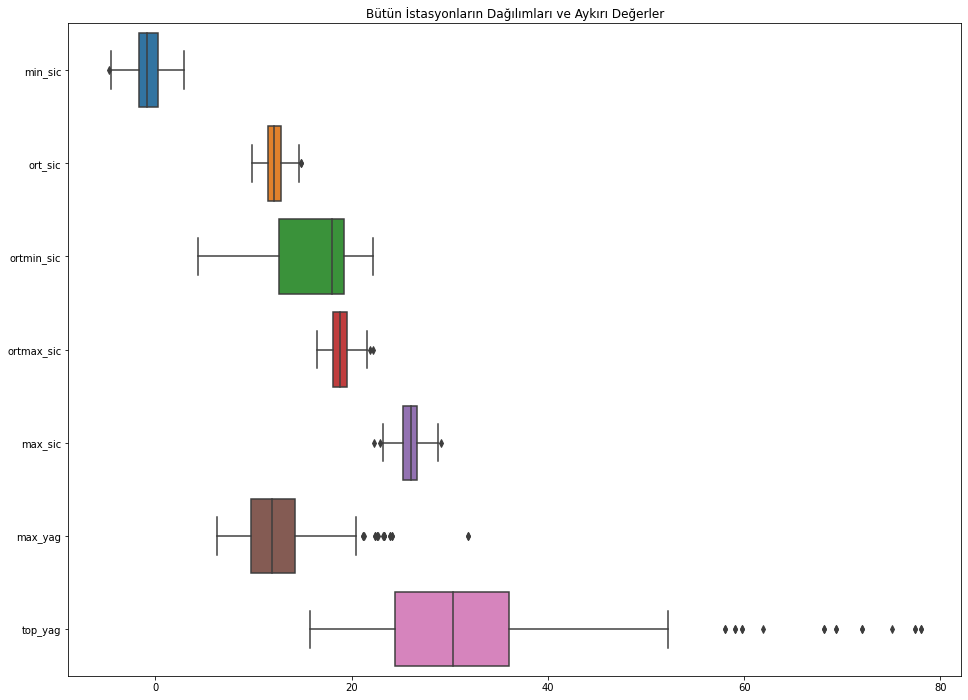

In [44]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.boxplot(data = df_all[["min_sic", "ort_sic", "ortmin_sic", "ortmax_sic", "max_sic",  "max_yag", "top_yag"]], 
            orient="h", ax=ax)
plt.title("Bütün İstasyonların Dağılımları ve Aykırı Değerler")
plt.show()

In [45]:
df_all.describe()

,Yıl,max_sic,max_yag,min_sic,ortmin_sic,ort_sic,top_yag,ortmax_sic,Aksaray,Beysehir,Cumra,Eregli,Havza_Ort,Karaman,Karapinar,Konya,Konya_Ort,Kulu,Nigde,Seydisehir
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,2010.500000,25.937600,12.806428,-0.776333,15.431339,12.183084,32.435829,18.891546,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
std,6.356339,1.143480,4.398616,1.400369,5.362128,0.985079,12.167184,1.058997,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910
min,2000.000000,22.258333,6.250000,-4.708333,4.333333,9.825000,15.725000,16.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,25.209226,9.706250,-1.629167,12.577500,11.525000,24.401786,18.137500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.500000,26.033333,11.945000,-0.888095,18.020833,12.089167,30.333333,18.866667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,26.704464,14.283333,0.272917,19.191667,12.827083,36.010714,19.554167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,29.066667,31.900000,2.941667,22.200000,14.866667,77.983333,22.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
def iqr_aykiri(param, df = df_all):
    Q1 = df[param].quantile(0.25)
    Q3 = df[param].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    aykiri = df.iloc[df[param][((df[param] < (lower_bound)) | (df[param] > (upper_bound)))]]
    aykiri.drop_duplicates(inplace=True)
    print("{} için aykırı değer sayısı: ".format(param), aykiri.shape[0])
    return aykiri.sort_values(by=["Yıl"])

In [47]:
aykiri = iqr_aykiri("max_sic")
aykiri = pd.concat([iqr_aykiri("ortmax_sic"), aykiri])
aykiri = pd.concat([iqr_aykiri("min_sic"), aykiri])
aykiri = pd.concat([iqr_aykiri("ortmin_sic"), aykiri])
aykiri = pd.concat([iqr_aykiri("ort_sic"), aykiri])
aykiri = pd.concat([iqr_aykiri("max_yag"), aykiri])
aykiri = pd.concat([iqr_aykiri("top_yag"), aykiri])
aykiri = aykiri.drop_duplicates()
print("Toplam aykırı değer sayısı: ", aykiri.shape[0])
aykiri

max_sic için aykırı değer sayısı:  2
ortmax_sic için aykırı değer sayısı:  2
min_sic için aykırı değer sayısı:  1
ortmin_sic için aykırı değer sayısı:  0
ort_sic için aykırı değer sayısı:  1
max_yag için aykırı değer sayısı:  5
top_yag için aykırı değer sayısı:  8
Toplam aykırı değer sayısı:  16


,Yıl,max_sic,max_yag,min_sic,ortmin_sic,ort_sic,top_yag,ortmax_sic,Aksaray,Beysehir,Cumra,Eregli,Havza_Ort,Karaman,Karapinar,Konya,Konya_Ort,Kulu,Nigde,Seydisehir
68,2002.0,26.916667,10.800000,-2.016667,18.883333,11.550000,32.933333,18.883333,0,0,0,1,0,0,0,0,0,0,0,0
69,2003.0,27.433333,11.500000,-2.158333,19.216667,12.075000,26.650000,19.216667,0,0,0,1,0,0,0,0,0,0,0,0
72,2006.0,26.591667,10.658333,-0.291667,19.458333,12.466667,27.666667,19.458333,0,0,0,1,0,0,0,0,0,0,0,0
75,2009.0,26.558333,6.416667,-0.408333,19.666667,12.691667,17.200000,19.666667,0,0,0,1,0,0,0,0,0,0,0,0
77,2011.0,25.125000,13.800000,-0.483333,18.216667,11.416667,33.400000,18.216667,0,0,0,1,0,0,0,0,0,0,0,0
58,2014.0,27.291667,14.250000,1.116667,20.183333,13.183333,34.350000,20.183333,0,0,1,0,0,0,0,0,0,0,0,0
59,2015.0,25.725000,8.750000,-0.300000,19.050000,12.150000,20.433333,19.050000,0,0,1,0,0,0,0,0,0,0,0,0
61,2017.0,25.908333,12.783333,-1.166667,19.100000,11.858333,31.300000,19.100000,0,0,1,0,0,0,0,0,0,0,0,0
22,2000.0,24.050000,18.500000,-2.100000,16.966667,10.150000,44.816667,16.966667,0,1,0,0,0,0,0,0,0,0,0,0
23,2001.0,25.125000,14.733333,-0.541667,18.641667,12.258333,34.800000,18.641667,0,1,0,0,0,0,0,0,0,0,0,0


In [48]:
def iqr_baskila(param, df = df_all):
    fig, axs = plt.subplots(1,2, figsize=(8, 4), sharey = True)
    sns.boxplot(data = df[param], orient="h", ax=axs[0])
    sns.distplot(df[param], ax=axs[1])
    axs[0].set_title("{} Parametresi için Aykırı Değerler ile Dağılım".format(param))
    plt.show()
    
    Q1 = df[param].quantile(0.25)
    Q3 = df[param].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    new_df_cap = df.copy()
    new_df_cap[param] = np.where(new_df_cap[param] > upper_bound, upper_bound, np.where(
            new_df_cap [param] < lower_bound, lower_bound, new_df_cap[param]))
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey = True)
    sns.boxplot(data = new_df_cap[param], orient="h", ax=axs[0])
    sns.distplot(new_df_cap[param], ax=axs[1])
    axs[0].set_title("{} Parametresi için Normal Dağılım".format(param))
    plt.show()
        
    return new_df_cap

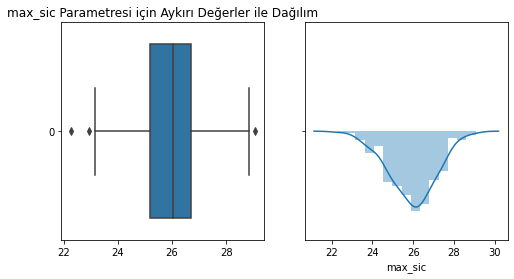

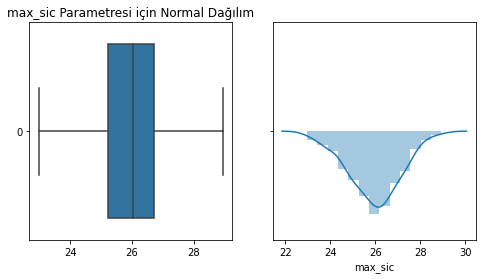

In [49]:
df_new = iqr_baskila("max_sic")

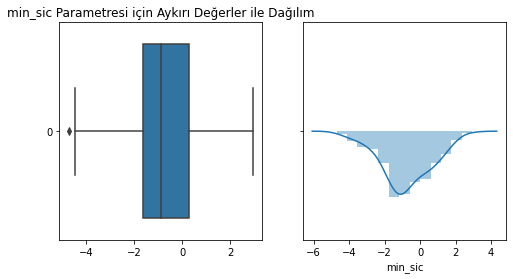

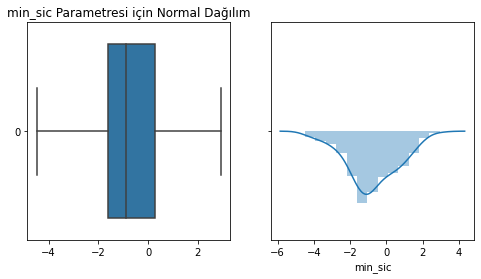

In [50]:
df_new = iqr_baskila("min_sic", df= df_new)

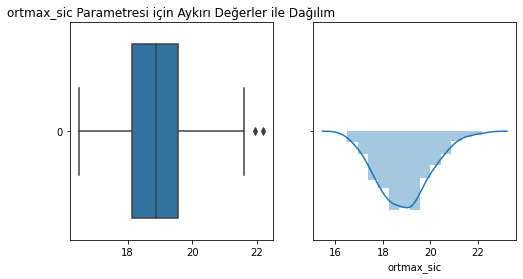

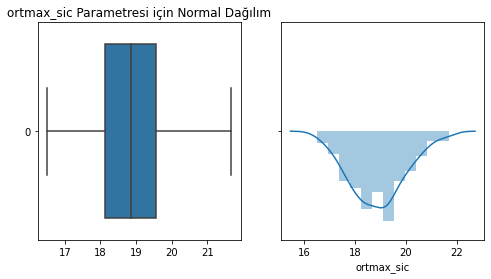

In [51]:
df_new = iqr_baskila("ortmax_sic", df = df_new)

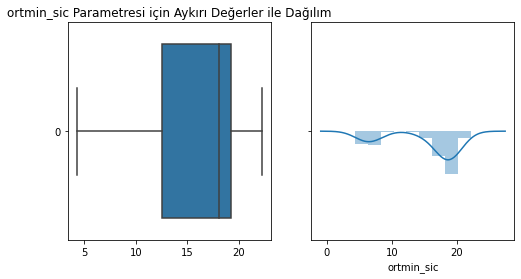

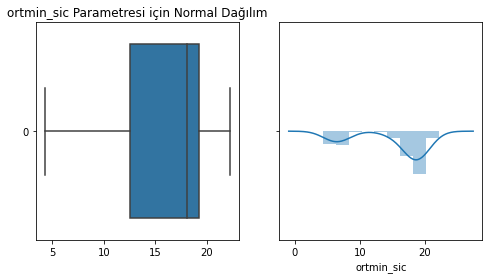

In [52]:
df_new = iqr_baskila("ortmin_sic", df = df_new)

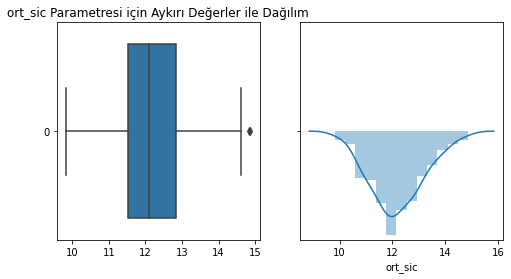

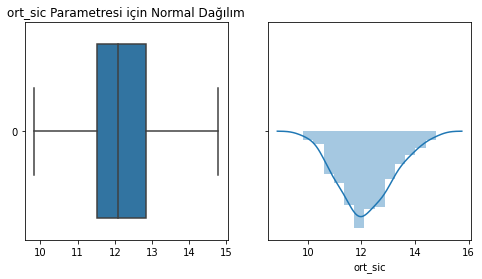

In [53]:
df_new = iqr_baskila("ort_sic", df = df_new)

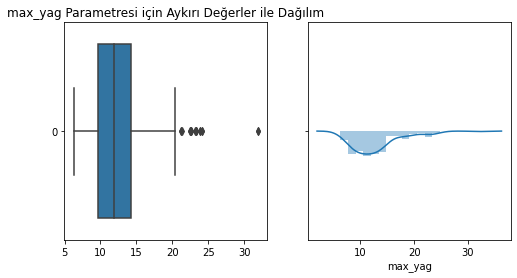

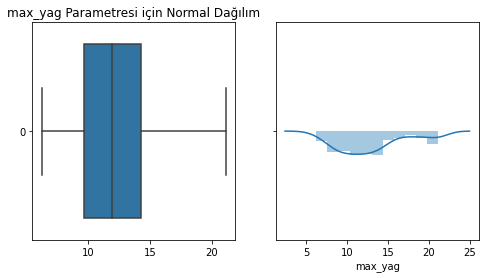

In [54]:
df_new = iqr_baskila("max_yag", df = df_new)

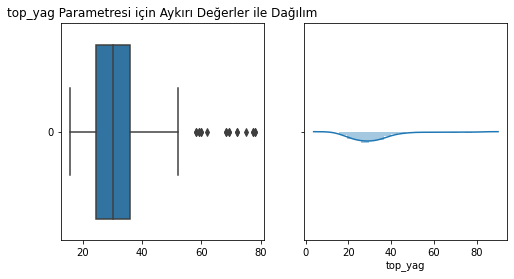

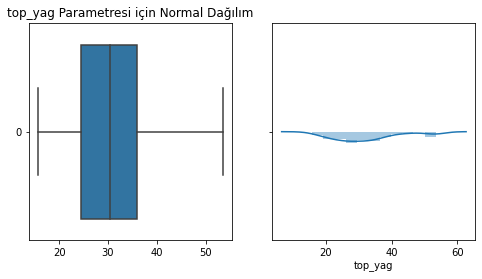

In [55]:
df_new = iqr_baskila("top_yag", df = df_new)

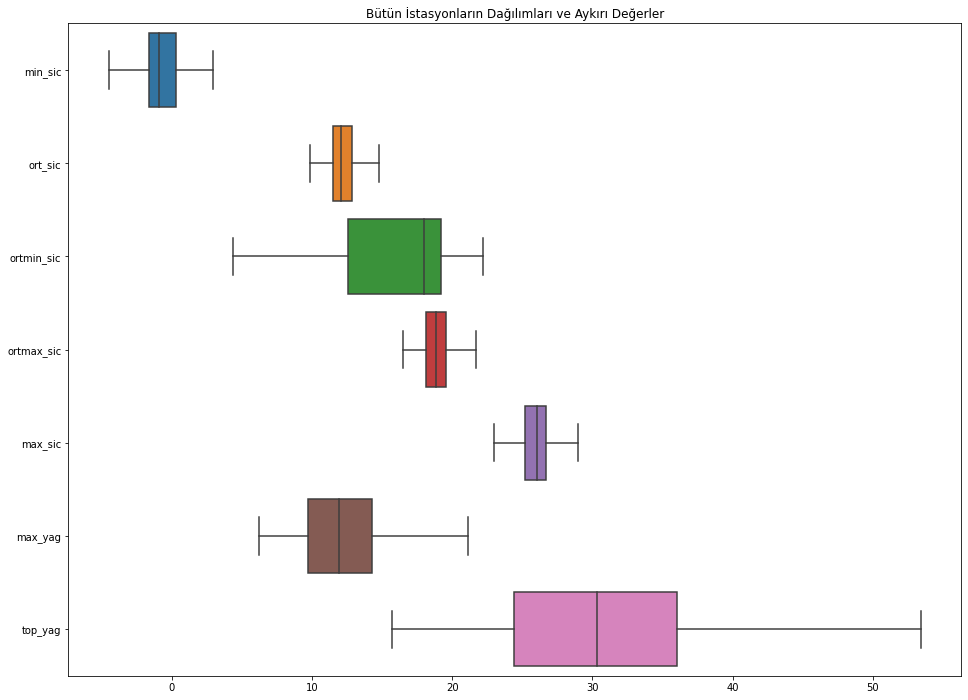

In [56]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.boxplot(data = df_new[["min_sic", "ort_sic", "ortmin_sic", "ortmax_sic", "max_sic",  "max_yag", "top_yag"]], 
            orient="h", ax=ax)
plt.title("Bütün İstasyonların Dağılımları ve Aykırı Değerler")
plt.show()

In [57]:
df_new

,Yıl,max_sic,max_yag,min_sic,ortmin_sic,ort_sic,top_yag,ortmax_sic,Aksaray,Beysehir,Cumra,Eregli,Havza_Ort,Karaman,Karapinar,Konya,Konya_Ort,Kulu,Nigde,Seydisehir
0,2000.0,25.816667,10.383333,-1.666667,5.433333,11.525000,29.100000,17.791667,1,0,0,0,0,0,0,0,0,0,0,0
1,2001.0,27.191667,6.350000,-0.208333,7.666667,13.875000,21.716667,20.191667,1,0,0,0,0,0,0,0,0,0,0,0
2,2002.0,26.050000,8.833333,-1.625000,5.691667,11.650000,25.366667,18.008333,1,0,0,0,0,0,0,0,0,0,0,0
3,2003.0,26.150000,6.250000,-0.016667,6.708333,12.408333,16.566667,18.366667,1,0,0,0,0,0,0,0,0,0,0,0
4,2004.0,26.066667,12.650000,-1.858333,5.991667,12.150000,26.925000,18.400000,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2017.0,24.800000,21.148958,-1.000000,18.525000,11.808333,53.424107,18.525000,0,0,0,0,0,0,0,0,0,0,0,1
260,2018.0,24.800000,18.866667,2.325000,20.008333,13.608333,53.424107,20.008333,0,0,0,0,0,0,0,0,0,0,0,1
261,2019.0,25.525000,19.383333,0.875000,19.108333,12.675000,53.424107,19.108333,0,0,0,0,0,0,0,0,0,0,0,1
262,2020.0,25.825000,21.148958,1.625000,19.600000,13.041667,50.566667,19.600000,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
df_new.describe()

,Yıl,max_sic,max_yag,min_sic,ortmin_sic,ort_sic,top_yag,ortmax_sic,Aksaray,Beysehir,Cumra,Eregli,Havza_Ort,Karaman,Karapinar,Konya,Konya_Ort,Kulu,Nigde,Seydisehir
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,2010.500000,25.939955,12.613676,-0.775477,15.431339,12.182587,31.454708,18.888642,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
std,6.356339,1.134064,3.867037,1.398023,5.362128,0.983744,9.369456,1.050691,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910,0.276910
min,2000.000000,22.966369,6.250000,-4.482292,4.333333,9.825000,15.725000,16.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,25.209226,9.706250,-1.629167,12.577500,11.525000,24.401786,18.137500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.500000,26.033333,11.945000,-0.888095,18.020833,12.089167,30.333333,18.866667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,26.704464,14.283333,0.272917,19.191667,12.827083,36.010714,19.554167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,28.947321,21.148958,2.941667,22.200000,14.780208,53.424107,21.679167,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Regresyon Modeli Hazırlama

In [59]:
val_df = pd.DataFrame({"Yıl" : [year for year in [2023,2024,2025,2030,2040,2050] for i in range(12) ], 
                      "İstasyon":["Aksaray", "Beysehir", "Cumra", "Eregli", "Havza_Ort", "Karaman", "Karapinar", 
                                  "Konya", "Konya_Ort", "Kulu", "Nigde", "Seydisehir"]*6})
istasyonval = pd.get_dummies(val_df.İstasyon)
yilval = pd.get_dummies(val_df.Yıl, prefix='yıl')
val_df = pd.concat([val_df,istasyonval],axis=1)
val_df.drop(columns='İstasyon', inplace=True)
val_df

,Yıl,Aksaray,Beysehir,Cumra,Eregli,Havza_Ort,Karaman,Karapinar,Konya,Konya_Ort,Kulu,Nigde,Seydisehir
0,2023,1,0,0,0,0,0,0,0,0,0,0,0
1,2023,0,1,0,0,0,0,0,0,0,0,0,0
2,2023,0,0,1,0,0,0,0,0,0,0,0,0
3,2023,0,0,0,1,0,0,0,0,0,0,0,0
4,2023,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2050,0,0,0,0,0,0,0,1,0,0,0,0
68,2050,0,0,0,0,0,0,0,0,1,0,0,0
69,2050,0,0,0,0,0,0,0,0,0,1,0,0
70,2050,0,0,0,0,0,0,0,0,0,0,1,0


In [60]:
def create_pred(reg, param, df = df_new):
    X = df[["Yıl", "Aksaray", "Beysehir", "Eregli", "Havza_Ort", "Konya_Ort", "Karaman", "Karapinar",
               "Konya", "Kulu", "Nigde", "Seydisehir", "Cumra"]]
    y = df[param]
    X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.15, random_state=42)
    
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    accuracy = r2_score(y_test, pred), mean_absolute_error(y_test, pred)
    
    val_pred = reg.predict(val_df[["Yıl", "Aksaray", "Beysehir", "Eregli", "Havza_Ort", "Konya_Ort", "Karaman", "Karapinar",
               "Konya", "Kulu", "Nigde", "Seydisehir", "Cumra"]])
    combined = pd.Series(val_pred, index=val_df.index)
    #combined = combined.rename({0:"tahmini_"+param})
    
    return accuracy, combined

In [61]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

rig = Ridge(alpha = .1)
rig_tra = TransformedTargetRegressor(regressor=rig, transformer=QuantileTransformer(output_distribution='normal'))

dt = DecisionTreeRegressor()
dt_tra = TransformedTargetRegressor(regressor=dt, transformer=QuantileTransformer(output_distribution='normal'))

lr = LinearRegression()
lr_tra = TransformedTargetRegressor(regressor=lr, transformer=QuantileTransformer(output_distribution='normal'))

ls = Lasso()
ls_tra = TransformedTargetRegressor(regressor=ls, transformer=QuantileTransformer(output_distribution='normal'))

rf = RandomForestRegressor()
rf_tra = TransformedTargetRegressor(regressor=rf, transformer=QuantileTransformer(output_distribution='normal'))

grad_reg = GradientBoostingRegressor()
grad_reg_tra = TransformedTargetRegressor(regressor=grad_reg, transformer=QuantileTransformer(output_distribution='normal'))

In [62]:
def all_model(param):
    rig_acc, rig_com = create_pred(rig, param)
    dt_acc, dt_com = create_pred(dt, param)
    lr_acc, lr_com = create_pred(lr, param)
    ls_acc, ls_com = create_pred(ls, param)
    rf_acc, rf_com = create_pred(rf, param)
    grad_acc, grad_com = create_pred(grad_reg, param)
    print("Accuracy\nRidge:{}\nDecision Tree:{}\nLinear Regression:{}\nLasso:{}\nRandom Forest:{}\nGradient Boosting Regressor:{}".
          format(rig_acc, dt_acc, lr_acc, ls_acc, rf_acc, grad_acc))
    
    rig_tra_acc, rig_tra_com = create_pred(rig_tra, param)
    dt_tra_acc, dt_tra_com = create_pred(dt_tra, param)
    lr_tra_acc, lr_tra_com = create_pred(lr_tra, param)
    ls_tra_acc, ls_tra_com = create_pred(ls_tra, param)
    rf_tra_acc, rf_tra_com = create_pred(rf_tra, param)
    grad_tra_acc, grad_tra_com = create_pred(grad_reg_tra, param)
    print("**********************************************\nTransformation Sonrası: ")
    print("Accuracy\nRidge:{}\nDecision Tree:{}\nLinear Regression:{}\nLasso:{}\nRandom Forest:{}\nGradient Boosting Regressor:{}".
          format(rig_tra_acc, dt_tra_acc, lr_tra_acc, ls_tra_acc, rf_tra_acc, grad_tra_acc))
    
    return grad_com, grad_tra_com

In [63]:
max_sic_com1, max_sic_com2 = all_model("max_sic")

Accuracy
Ridge:(0.5070812237318674, 0.6013525809042066)
Decision Tree:(0.18099270556198954, 0.7634285714285712)
Linear Regression:(0.5077829081900447, 0.6008312266621807)
Lasso:(-0.0021204626653492653, 0.9084487395540387)
Random Forest:(0.5389327467323566, 0.5894076339285749)
Gradient Boosting Regressor:(0.8918154271401708, 0.30543446365518917)
**********************************************
Transformation Sonrası: 
Accuracy
Ridge:(0.5182990038624602, 0.5994524044354674)
Decision Tree:(0.17747078450504516, 0.7692619047619048)
Linear Regression:(0.5192094239873286, 0.5993568917124608)
Lasso:(-0.01766761737811673, 0.9152318782986235)
Random Forest:(0.5505249886448436, 0.5885747236903993)
Gradient Boosting Regressor:(0.8715077920033031, 0.33691494642878483)


<AxesSubplot:>

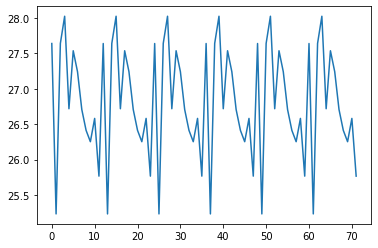

In [64]:
max_sic_com2.plot()

In [65]:
ortmax_sic_com1, ortmax_sic_com2 = all_model("ortmax_sic")

Accuracy
Ridge:(0.21756013737400837, 0.6869639116652858)
Decision Tree:(0.5947497006084822, 0.46293749999999917)
Linear Regression:(0.21756498405407598, 0.6871191107957858)
Lasso:(-0.016865595190272753, 0.7721335554050177)
Random Forest:(0.7336613873920828, 0.37378636904761764)
Gradient Boosting Regressor:(0.8773493680993502, 0.2886845775545558)
**********************************************
Transformation Sonrası: 
Accuracy
Ridge:(0.22180724602461188, 0.6829551809574064)
Decision Tree:(0.5824527220187619, 0.4488869047619035)
Linear Regression:(0.22093731614523104, 0.6840025926103567)
Lasso:(-0.019686584537465857, 0.7765457916749466)
Random Forest:(0.7369376259312647, 0.3575604225881066)
Gradient Boosting Regressor:(0.8358848832645909, 0.2935667861165502)


<AxesSubplot:>

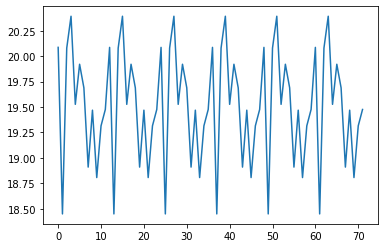

In [66]:
ortmax_sic_com1.plot()

In [67]:
min_sic_com1, min_sic_com2 = all_model("min_sic")

Accuracy
Ridge:(0.6407268028007338, 0.6394542093617419)
Decision Tree:(0.6911399840875243, 0.5839315476190479)
Linear Regression:(0.6408792199132525, 0.6391222663979486)
Lasso:(0.31899826186145774, 0.908185975127463)
Random Forest:(0.8227662230062136, 0.42009806547619066)
Gradient Boosting Regressor:(0.8425523383226167, 0.41603717425656966)
**********************************************
Transformation Sonrası: 
Accuracy
Ridge:(0.628608810439163, 0.6421048911024579)
Decision Tree:(0.6953297107885821, 0.585419642857143)
Linear Regression:(0.6284414011504424, 0.6413906531657472)
Lasso:(0.30335196220141203, 0.9327520117290025)
Random Forest:(0.8199261395940998, 0.4310245392751787)
Gradient Boosting Regressor:(0.8130858742416393, 0.4547850258113755)


<AxesSubplot:>

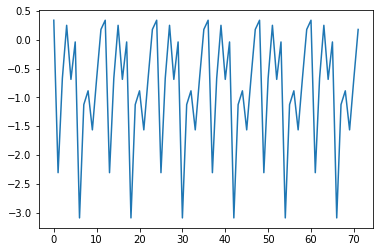

In [68]:
min_sic_com1.plot()

In [69]:
ortmin_sic_com1, ortmin_sic_com2 = all_model("ortmin_sic")

Accuracy
Ridge:(0.9743253099957774, 0.6652661035631627)
Decision Tree:(0.9760551491991305, 0.680113095238095)
Linear Regression:(0.9744254549475394, 0.6640003491946029)
Lasso:(-0.020610392053004523, 4.885584071800429)
Random Forest:(0.9746990503940846, 0.6892155654761899)
Gradient Boosting Regressor:(0.9871245725787284, 0.5291362074864348)
**********************************************
Transformation Sonrası: 
Accuracy
Ridge:(0.9339872878358043, 0.9206161941016532)
Decision Tree:(0.960335503557981, 0.8006190476190479)
Linear Regression:(0.934314403866037, 0.9200503355952083)
Lasso:(-0.3042730231810553, 4.326081604645772)
Random Forest:(0.9664327269460257, 0.7113363845666718)
Gradient Boosting Regressor:(0.9343728980787678, 0.7759012313912168)


<AxesSubplot:>

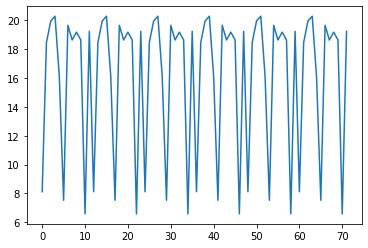

In [70]:
ortmin_sic_com1.plot()

In [71]:
ort_sic_com1, ort_sic_com2 = all_model("ort_sic")

Accuracy
Ridge:(0.29325535216435883, 0.6222852156261837)
Decision Tree:(0.7734586933912819, 0.34011011904761984)
Linear Regression:(0.29314024579672415, 0.6227341511380466)
Lasso:(0.07243560771091351, 0.7412588342172437)
Random Forest:(0.813573793351393, 0.3177743824404755)
Gradient Boosting Regressor:(0.9141982245497166, 0.23148010044395964)
**********************************************
Transformation Sonrası: 
Accuracy
Ridge:(0.2639843224007933, 0.6465818420889569)
Decision Tree:(0.7682694438608055, 0.34607142857142903)
Linear Regression:(0.26418729629385007, 0.6471251782138211)
Lasso:(0.06651859182050246, 0.7487126859445042)
Random Forest:(0.8186905239723374, 0.31039225842844526)
Gradient Boosting Regressor:(0.9103051270441508, 0.23583737270089666)


<AxesSubplot:>

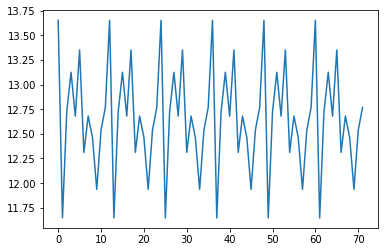

In [72]:
ort_sic_com2.plot()

In [73]:
max_yag_com1, max_yag_com2 = all_model("max_yag")

Accuracy
Ridge:(0.482998021150428, 2.0171810147184677)
Decision Tree:(0.375393051821601, 2.2889508928571423)
Linear Regression:(0.48216476898808514, 2.0170429899426146)
Lasso:(-0.006376472371984354, 2.9687233604379246)
Random Forest:(0.5152494965625116, 2.0248404538690514)
Gradient Boosting Regressor:(0.6127191415018111, 1.8501157078449082)
**********************************************
Transformation Sonrası: 
Accuracy
Ridge:(0.4649090523261429, 2.0394160970842665)
Decision Tree:(0.32769513279590745, 2.402117559523809)
Linear Regression:(0.46204828904074824, 2.0461240249003807)
Lasso:(-0.008027109021998324, 2.972393271566669)
Random Forest:(0.5529112928198947, 1.9124755375136941)
Gradient Boosting Regressor:(0.6346927528709779, 1.6932266309899482)


<AxesSubplot:>

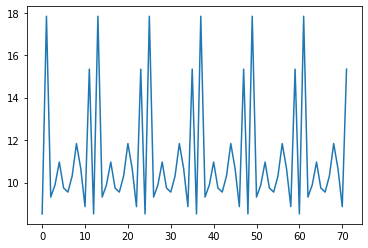

In [74]:
max_yag_com1.plot()

In [75]:
top_yag_com1, top_yag_com2 = all_model("top_yag")

Accuracy
Ridge:(0.5721721310552776, 4.554409095314434)
Decision Tree:(0.1926275460323631, 7.093598214285715)
Linear Regression:(0.571922382750615, 4.54559163288376)
Lasso:(0.29202457063294085, 6.770206903197055)
Random Forest:(0.46067159475110575, 5.708269538690473)
Gradient Boosting Regressor:(0.6581015514358644, 4.312789532588252)
**********************************************
Transformation Sonrası: 
Accuracy
Ridge:(0.5809011287999704, 4.580976743267408)
Decision Tree:(0.3023412941317202, 6.469431547619047)
Linear Regression:(0.5800989365504242, 4.583263222215381)
Lasso:(-0.020850840770996193, 7.795305059523807)
Random Forest:(0.4823033103117337, 5.407026550303632)
Gradient Boosting Regressor:(0.6797327487830693, 4.087138915276719)


<AxesSubplot:>

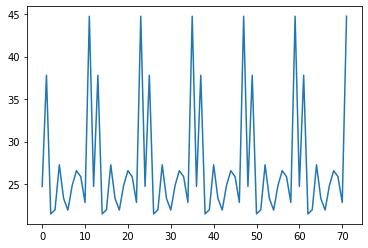

In [76]:
top_yag_com1.plot()

In [77]:
max_sic_com2

0     27.640801
1     25.232675
2     27.642624
3     28.026270
4     26.719164
        ...    
67    26.708093
68    26.413779
69    26.253269
70    26.582377
71    25.766650
Length: 72, dtype: float64

In [78]:
tahmini_df = pd.DataFrame({"max_sic":max_sic_com2, "min_sic":min_sic_com1, "ortmax_sic":ortmax_sic_com1, 
                           "ortmin_sic":ortmin_sic_com1, "ort_sic":ort_sic_com2, "max_yag":max_yag_com1, 
                           "top_yag":top_yag_com1})
val_df["max_sic"] = max_sic_com2
val_df["min_sic"] = min_sic_com1
val_df["ortmax_sic"] = ortmax_sic_com1
val_df["ortmin_sic"] = ortmin_sic_com1
val_df["ort_sic"] = ort_sic_com2
val_df["max_yag"] = max_yag_com1
val_df["top_yag"] = top_yag_com1
val_df

,Yıl,Aksaray,Beysehir,Cumra,Eregli,Havza_Ort,Karaman,Karapinar,Konya,Konya_Ort,Kulu,Nigde,Seydisehir,max_sic,min_sic,ortmax_sic,ortmin_sic,ort_sic,max_yag,top_yag
0,2023,1,0,0,0,0,0,0,0,0,0,0,0,27.640801,0.338144,20.087014,8.119173,13.651982,8.520901,24.716978
1,2023,0,1,0,0,0,0,0,0,0,0,0,0,25.232675,-2.307315,18.449041,18.457885,11.646897,17.832899,37.800623
2,2023,0,0,1,0,0,0,0,0,0,0,0,0,27.642624,-0.669306,20.080180,19.943927,12.721549,9.315591,21.476852
3,2023,0,0,0,1,0,0,0,0,0,0,0,0,28.026270,0.250236,20.393166,20.274896,13.124097,9.889290,21.962237
4,2023,0,0,0,0,1,0,0,0,0,0,0,0,26.719164,-0.687807,19.526685,16.108093,12.679893,10.963609,27.261559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2050,0,0,0,0,0,0,0,1,0,0,0,0,26.708093,-1.125630,18.909557,18.629445,12.679893,10.307961,24.817549
68,2050,0,0,0,0,0,0,0,0,1,0,0,0,26.413779,-0.886791,19.469268,19.173184,12.463093,11.835778,26.565636
69,2050,0,0,0,0,0,0,0,0,0,1,0,0,26.253269,-1.564298,18.806642,18.636287,11.936421,10.658231,25.864127
70,2050,0,0,0,0,0,0,0,0,0,0,1,0,26.582377,-0.670206,19.315519,6.581850,12.535874,8.864037,22.830577


In [79]:
df_all[["Yıl", "max_sic", "min_sic", "ort_sic", "ortmax_sic", "ortmin_sic", "max_yag", "top_yag"]].corr()["Yıl"]

Yıl           1.000000
max_sic       0.094714
min_sic       0.539633
ort_sic       0.450858
ortmax_sic    0.396661
ortmin_sic    0.083871
max_yag      -0.014877
top_yag      -0.041460
Name: Yıl, dtype: float64

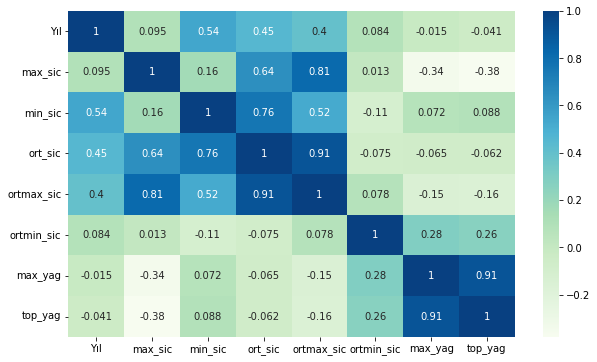

In [80]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_all[["Yıl", "max_sic", "min_sic", "ort_sic", "ortmax_sic", "ortmin_sic", "max_yag", "top_yag"]].corr(),
            cmap='GnBu', annot=True, ax=ax)
plt.show()

In [81]:
df_new.to_csv("train_test.csv")
val_df.to_csv("validation.csv")

## Veri Analizi

In [82]:
def plotall(name, df):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharey=True)
    p1 = sns.lineplot(x = "Yıl", y = "max_sic", linewidth = 5, data = df_all, label = "Aylık Maksimum Sıcaklık", color = "red", 
                      ax = axs[0][0])
    sns.lineplot(x = "Yıl", y = "ort_sic", data = df_all, linewidth = 5, label = "Aylık Ortalama Sıcaklık", color = "orange", 
                 ax = axs[0][1])
    sns.lineplot(x = "Yıl", y = "min_sic", data = df_all, linewidth = 5, label = "Aylık Minimum Sıcaklık", color = "yellow", 
                 ax = axs[0][2])
    p2 = sns.lineplot(x = "Yıl", y = "ortmax_sic", data = df_all, linewidth = 5, label = "Aylık Ortalama Maksimum Sıcaklık", 
                      color = "red", ax = axs[1][0])
    sns.lineplot(x = "Yıl", y = "ortmin_sic", data = df_all, linewidth = 5, label = "Aylık Ortalama Minimum Sıcaklık", 
                 color = "yellow", ax = axs[1][2])
    p3 = sns.lineplot(x = "Yıl", y = "max_yag", data = df_all, linewidth = 5, label = "Aylık Maksimum Yağış", 
                      color = "blue", ax = axs[2][0])
    sns.lineplot(x = "Yıl", y = "top_yag", data = df_all, linewidth = 5, label = "Aylık Toplam Yağış", 
                 color = "dodgerblue", ax = axs[2][1])

    fig.suptitle("{} İçin Yıllık Sıcaklık ve Yağış Değerleri".format(name), fontsize=20)
    p1.set_ylabel("Sıcaklık (°C)", fontsize=15)
    p2.set_ylabel("Sıcaklık (°C)", fontsize=15)
    p3.set_ylabel("Yağış (mm)", fontsize=15)
    sns.despine()
    plt.show()

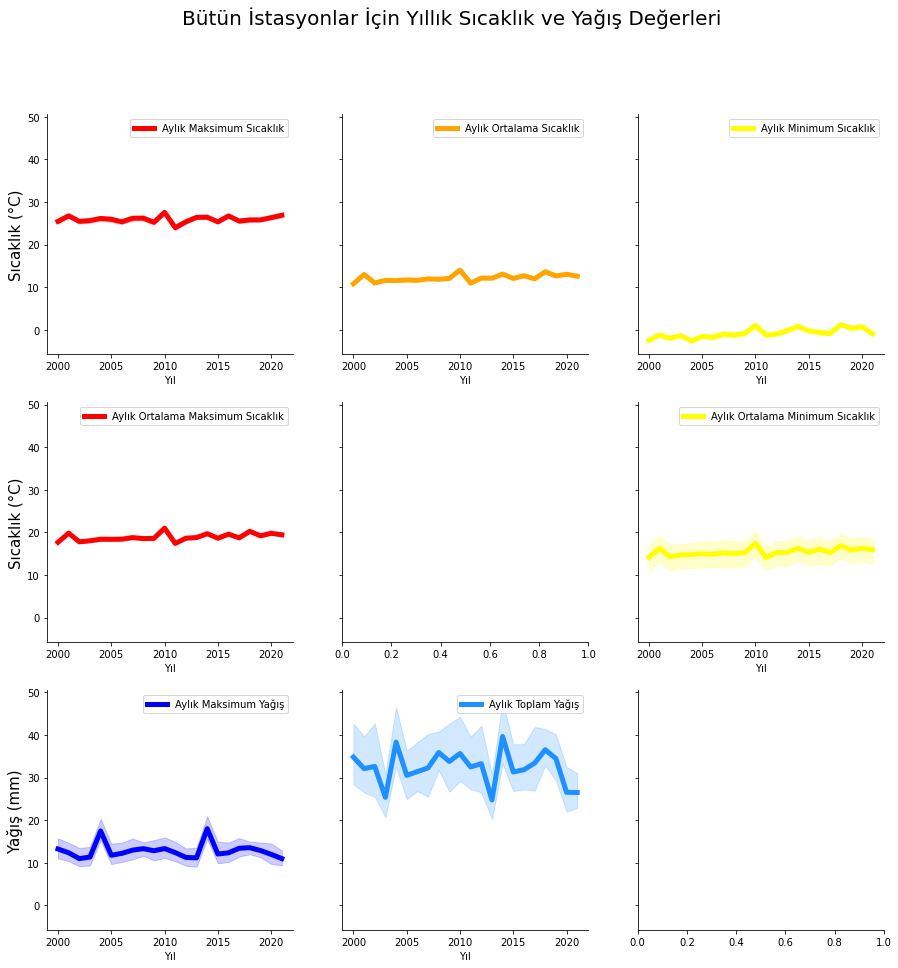

In [83]:
plotall("Bütün İstasyonlar", df_new)

* Sıcaklık düzenli bir şekilde ilerlemiş.
* Yağış verileri düzensiz bir şekilde ilerlemiş. Karasal iklim özelliklerine uygun.
* 2000 - 2005 arasında sıcaklık bir tık artıp geri inmiştir. Bunun sebebi 2001 yılında ciddi kuraklık yaşanmasıdır. (Türkeş, 2003; akt. Kapluhan, 2013)
* 2013 - 2014 ve 2007 - 2008 arasında da sıcaklıkalrda ani artma var bu yıllar da kurak. (Kurnaz, 2014)
* 2015 sonrasında bazı istasyonlarda yağış ani artmıştır.
* Seydişehir ve Beyşehir daha düzenli bir yağışa sahiptir.

Şimdi de karma birleştirdiğimiz verilerin dağılımlarını inceleyelim. Bu şekilde aykırı değerleri tespit etmiş oluruz.